In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = '/kaggle/input/freshfind/train'
VALIDATION_DIR = '/kaggle/input/freshfind/validation'

Let's take a look at what the images look like.

/kaggle/input/freshfind/train/Broccoli
/kaggle/input/freshfind/train/Hourse Mackerel
/kaggle/input/freshfind/train/apple
/kaggle/input/freshfind/train/Black Sea Sprat
/kaggle/input/freshfind/train/Sea Bass
/kaggle/input/freshfind/train/Carrot
/kaggle/input/freshfind/train/coconut
/kaggle/input/freshfind/train/Cabbage
/kaggle/input/freshfind/train/Shrimp
/kaggle/input/freshfind/train/dragonfruit
/kaggle/input/freshfind/train/avocado
/kaggle/input/freshfind/train/Cucumber
/kaggle/input/freshfind/train/Red Sea Bream
/kaggle/input/freshfind/train/banana
/kaggle/input/freshfind/train/Potato
['Broccoli', 'Hourse Mackerel', 'apple', 'Black Sea Sprat', 'Sea Bass', 'Carrot', 'coconut', 'Cabbage', 'Shrimp', 'dragonfruit', 'avocado', 'Cucumber', 'Red Sea Bream', 'banana', 'Potato']


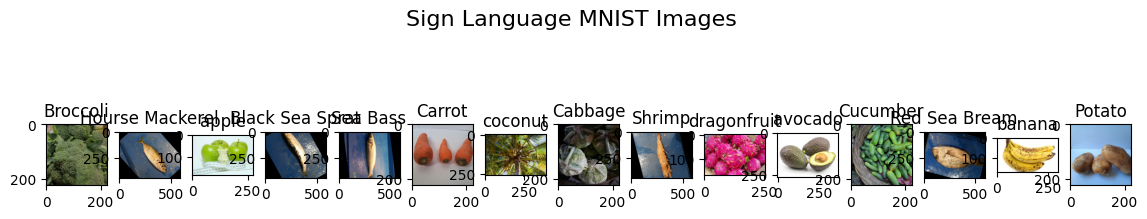

In [3]:
lab = os.listdir(TRAIN_DIR)
fig, axes = plt.subplots(1, len(lab), figsize=(14, 3))
fig.suptitle('Sign Language MNIST Images', fontsize=16)

# Plot one image from the first 4 letters
for ii, label in enumerate(lab):
    dir = f'{TRAIN_DIR}/{label}'
    print(dir)
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(label)
print(lab)

By plotting the images with `matplotlib` you can readily see images have a resolution of 28x28 (look at the image axes) and are in greyscale, but you can double check this by using the code below:

In [4]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (224, 224, 3)


Don't worry about the last dimension. That is because the [`img_to_array`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array) function returns a 3D array. You can easily check that actually it has repeated the same values in each dimension, for example, take a look at the first 5 columns of the image. All you really care about is that your image is 28x28 pixels. 

In [5]:
sample_array[0,:5]

array([[153., 193., 228.],
       [154., 194., 229.],
       [154., 194., 229.],
       [154., 194., 229.],
       [154., 194., 229.]], dtype=float32)

## Creating the datasets for the CNN

### Exercise 1: train_val_datasets

Your first task is to code the function that will create the datasets that will yield batches of images, both for training and validation. For this complete the `train_val_datasets` function below.

For grading purposes, make sure to use a **batch size of 32**. 

In [6]:
def train_val_datasets():
    """Create train and validation datasets with data augmentation.

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """
    # Create dataset from directory
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(200, 200),
        label_mode="categorical",
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(200, 200),
        label_mode="categorical",
    )
    return train_dataset, validation_dataset


In [ ]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets()
print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")  
len(train_dataset)

Found 15093 files belonging to 15 classes.


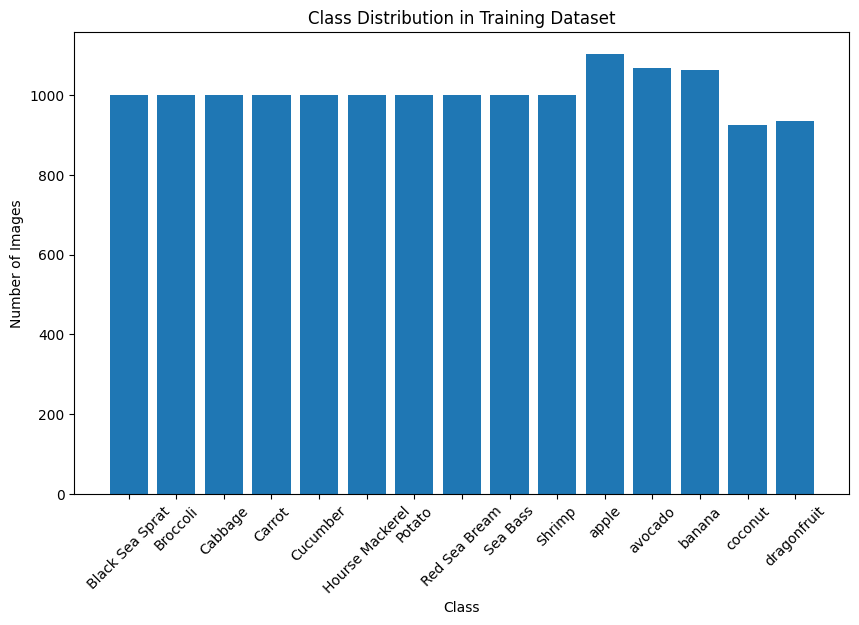

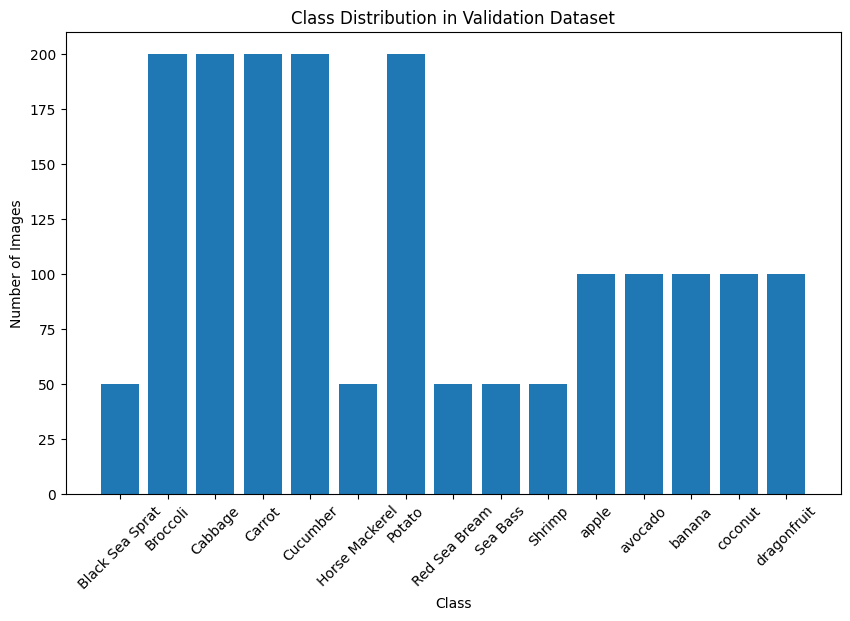

In [8]:
def plot_class_distribution(dataset, title):
    # Access class names before any augmentation
    class_names = dataset.class_names
    
    # Count occurrences of each class
    class_counts = {class_name: 0 for class_name in class_names}
    
    for images, labels in dataset:
        # Get class index from labels (one-hot encoded)
        class_indices = tf.argmax(labels, axis=-1).numpy()
        
        for class_index in class_indices:
            class_name = class_names[class_index]
            class_counts[class_name] += 1
    
    # Plot class distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

# Assuming train_dataset and validation_dataset are passed
plot_class_distribution(train_dataset, "Class Distribution in Training Dataset")
plot_class_distribution(validation_dataset, "Class Distribution in Validation Dataset")


## Coding the CNN

### Exercise : create_model

One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below. This function should return a Keras' model that uses the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) API.

A couple of things to keep in mind when defining the architecture:

- Start the model with an [`Input`](https://www.tensorflow.org/api_docs/python/tf/keras/Input) followed by a layer that rescales your images so that each pixel has values between 0 and 1 
  
- There different ways to implement the output layer, however, we expect the last layer of your model to have a number of units that corresponds to the number of possible categories, as well as the correct activation function.

- Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is suitable for multi-class classification. Remember to also define suitable `metric` to monitor.

**Note that you should use no more than 2 Conv2D and 2 MaxPooling2D layers to achieve the desired performance. You can also add dropout layers to improve training**

In [9]:
# GRADED FUNCTION: create_model
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    ### START CODE HERE ###      
    
    # Define the model
    # Use no more than 2 Conv2D and 2 MaxPooling2D
    model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape=(200, 200, 3)),
        tf.keras.layers.Rescaling(1./255),
        # This is the first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # # The 3rd convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        # 512 neuron hidden layer
        # tf.keras.layers.Dense(512, activation='relu',#),
        #                       kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu',),
                              # kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        tf.keras.layers.Dense(32, activation='relu',),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(lab), activation='softmax',),
                            #   kernel_regularizer=tf.keras.regularizers.l2(0.02))
        ]) 

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                #   loss = "binary_crossentropy",
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

    ### END CODE HERE ### 
    return model

The next cell allows you to check the number of total and trainable parameters of your model and prompts a warning in case these exceeds those of a reference solution, this serves the following 3 purposes listed in order of priority:

- Helps you prevent crashing the kernel during training.

- Helps you avoid longer-than-necessary training times.
- Provides a reasonable estimate of the size of your model. In general you will usually prefer smaller models given that they accomplish their goal successfully.


**Notice that this is just informative** and may be very well below the actual limit for size of the model necessary to crash the kernel. So even if you exceed this reference you are probably fine. However, **if the kernel crashes during training or it is taking a very long time and your model is larger than the reference, come back here and try to get the number of parameters closer to the reference.**

In [10]:
# Create your model

model = create_model()

Check that the input and output shape of your model are correct

In [11]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 200, 200, 3)
Output shape: (None, 15)


Expected output:

```
Input shape: (None, 28, 28, 1)
Output shape: (None, 24)
```

Using the `summary` method you can visulize the model you just defined.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,667,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,728,495 (33.30 MB)

 Trainable params: 8,728,495 (33.30 MB)

 Non-trainable params: 0 (0.00 B)


Check that the architecture you used is compatible with the dataset (you can ignore the warnings prompted by using the GPU):

In [13]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels
	
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

I0000 00:00:1733984740.701686    3120 service.cc:145] XLA service 0x782b8c00aa40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733984740.701729    3120 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733984740.701732    3120 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733984741.930791    3120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


predictions have shape: (32, 15)


**Expected output:**

```
predictions have shape: (32, 24)
```

Finally, you can go ahead and train your model

In [14]:
# Train your model
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset,
                    shuffle=True)

Epoch 1/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.3060 - loss: 1.9922 - val_accuracy: 0.6634 - val_loss: 1.2199
Epoch 2/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.7392 - loss: 0.7748 - val_accuracy: 0.7749 - val_loss: 0.8384
Epoch 3/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8357 - loss: 0.4940 - val_accuracy: 0.8034 - val_loss: 0.7169
Epoch 4/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8744 - loss: 0.3815 - val_accuracy: 0.7823 - val_loss: 0.9239
Epoch 5/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.8993 - loss: 0.3038 - val_accuracy: 0.8069 - val_loss: 1.0969
Epoch 6/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9203 - loss: 0.2440 - val_accuracy: 0.8600 - val_loss: 0.5211
Epoch 7/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9342 - loss: 0.2094 - val_accuracy: 0.8377 - val_loss: 0.9989
Epoch 8/15
472/472 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9475 - loss: 0.1637 - 

Now take a look at your training history:

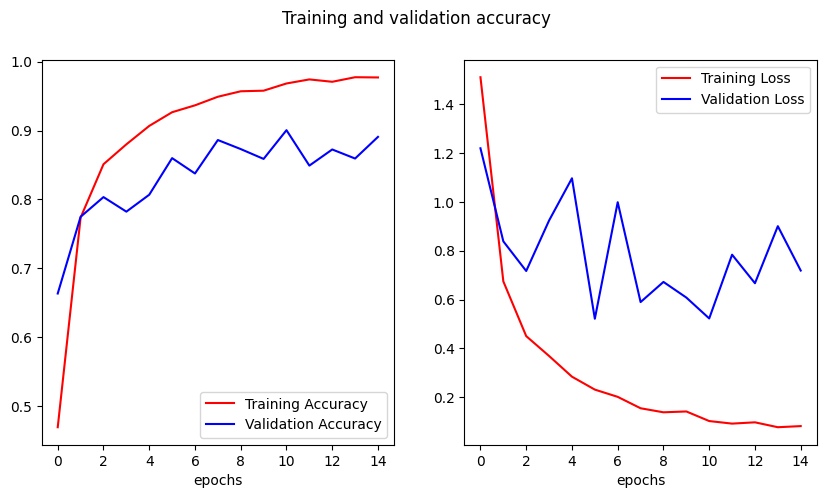

In [15]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "/kaggle/input/freshfind/train/Broccoli/0001.jpg"
img = image.load_img(img_path, target_size=(200, 200))  # Match the model's expected input size

# Convert the image to array format and add a batch dimension
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  

# Make the prediction
model.summary()
print(img_array.shape)
prediction = model.predict(img_array)
# if prediction < 0.5:
#     label = "Cats"
# else:
#     label = "Dogs"
labels = lab
labels.sort()
arr = np.argmax(prediction)
print(f"Prediksi: {labels[arr]} with {prediction} max {arr}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,667,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,185,487 (99.89 MB)

 Trainable params: 8,728,495 (33.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,456,992 (66.59 MB)

(1, 200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Prediksi: Broccoli with [[2.0076180e-15 1.0000000e+00 1.6075681e-10 1.8110599e-26 1.9292645e-15
  1.2350165e-19 2.4805482e-19 1.9078419e-16 4.3982288e-21 7.6820347e-20
  3.8430242e-16 3.8982179e-11 1.0179127e-14 7.2965424e-14 4.9308040e-13]] max 1


In [17]:
def export_to_keras_format(model, output_path="freshfind_model.keras"):
    """
    Exports a TensorFlow/Keras model to the newer Keras (.keras) format.

    Args:
        model (tf.keras.Model): The trained model to export.
        output_path (str): The file path to save the Keras model. Defaults to "freshfind_model.keras".

    Returns:
        None
    """
    # Save the model in the .keras format
    model.save(output_path, save_format="keras")

    print(f"Model successfully exported to {output_path}")

# Example usage:
# Assuming `model` is your trained Keras model
export_to_keras_format(model)


Model successfully exported to freshfind_model.keras


In [ ]:
import os

saved_model_dir = "/kaggle/input/fresh_find/tensorflow2/fresh_find/1"
print("Isi direktori:", os.listdir(saved_model_dir))
